In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

对于视角变换，我们需要一个3x3的变换矩阵，变换前后直线还是直线。要构建这个变换矩阵，我们需要在输入图像上找4个点，以及它们在输出图像上对应的位置。这四个点中的任意三个不能共线，该变换矩阵可以由cv2.getPerspectiveTransform构建，然后把该矩阵交给cv2.warpPerspective.

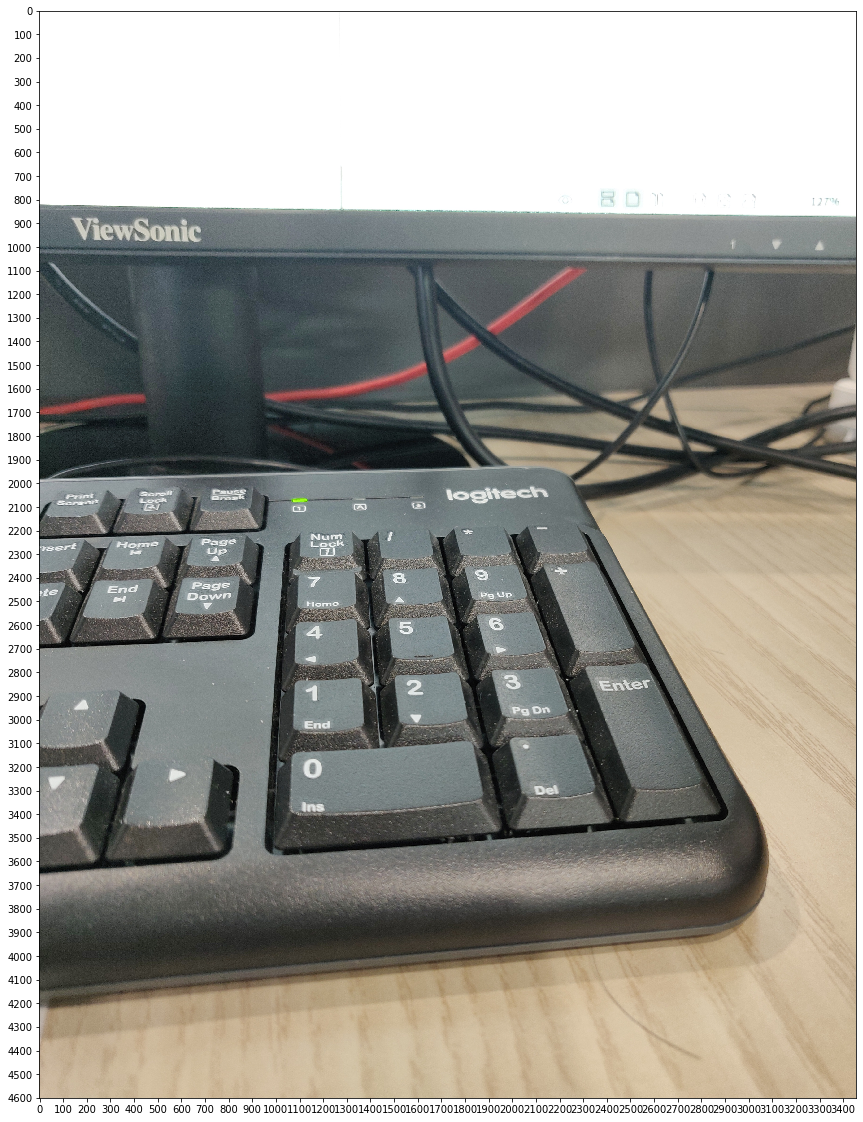

In [3]:
img = cv2.imread('./imgdata/perepective.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(figsize=[20, 20])
ax.imshow(img)
ax.set_xticks(range(0, img.shape[1], 100))
ax.set_yticks(range(0, img.shape[0], 100))
plt.show()

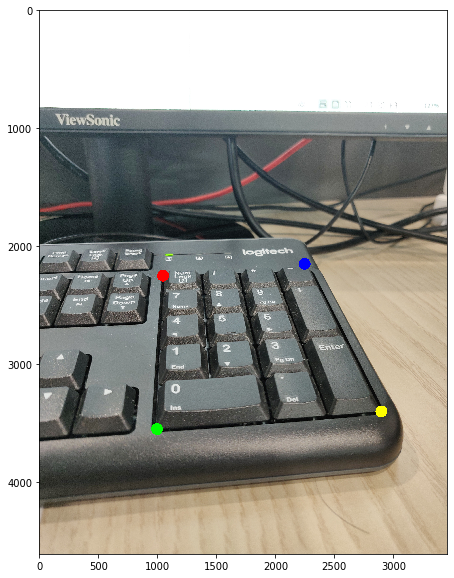

In [4]:
img = cv2.circle(img, center=(1050, 2250), radius=50, color=[255, 0, 0], thickness=-1) # red
img = cv2.circle(img, center=(1000, 3550), radius=50, color=[0, 255, 0], thickness=-1) # blue
img = cv2.circle(img, center=(2250, 2150), radius=50, color=[0, 0, 255], thickness=-1) # green
img = cv2.circle(img, center=(2900, 3400), radius=50, color=[255, 255, 0], thickness=-1) # yellow
fig, ax = plt.subplots(figsize=[16, 10])
ax.imshow(img)
# ax.scatter(x=[1000, 2900, 1050, 2250], y=[3550, 3400, 2250, 2150], s=200, c='r')
plt.show()

In [5]:
img.shape

(4608, 3456, 3)

#### cv2.getPerspectiveTransform(src, dst) 
+ src：源图像中待测矩形的四点坐标
+ sdt：目标图像中矩形的四点坐标

#### cv2.warpPerspective(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])
+ src：输入图像
+ M：变换矩阵
+ dsize：目标图像shape
+ flags：插值方式，interpolation方法INTER_LINEAR或INTER_NEAREST
+ borderMode：边界补偿方式，BORDER_CONSTANT or BORDER_REPLICATE
+ borderValue：边界补偿大小，常值，默认为0

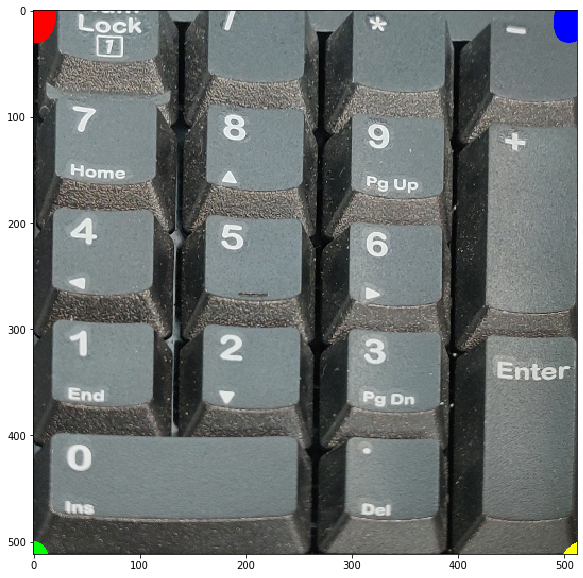

In [6]:
src_pts = np.float32([[1050, 2250], [1000, 3550], [2250, 2150], [2900, 3400]])  # [x, y]
dst_pts = np.float32([[0, 0], [0, 512], [512, 0], [512, 512]])  # [x, y]
perspective_matrix = cv2.getPerspectiveTransform(src=src_pts, dst=dst_pts)
img_perspective = cv2.warpPerspective(img, perspective_matrix, (512, 512))

fig, ax = plt.subplots(figsize=[16, 10])
ax.imshow(img_perspective)
plt.show()

In [7]:
perspective_matrix

array([[-8.61864492e+00, -3.31486343e-01,  9.79542144e+03],
       [-1.04317587e+00, -1.25181105e+01,  2.92610832e+04],
       [-8.15903495e-04, -8.97647569e-03,  1.00000000e+00]])

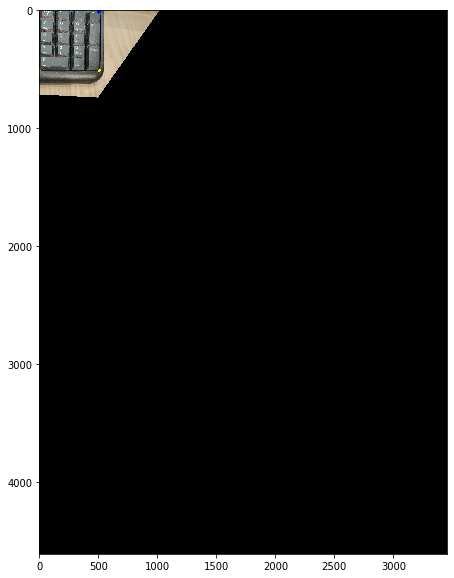

In [8]:
src_pts = np.float32([[1050, 2250], [1000, 3550], [2250, 2150], [2900, 3400]])  # [x, y]
dst_pts = np.float32([[0, 0], [0, 512], [512, 0], [512, 512]])  # [x, y]
perspective_matrix = cv2.getPerspectiveTransform(src=src_pts, dst=dst_pts)
img_perspective = cv2.warpPerspective(img, perspective_matrix, (img.shape[1], img.shape[0]))

fig, ax = plt.subplots(figsize=[16, 10])
ax.imshow(img_perspective)
plt.show()